In [1]:
import networkx as nx
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
def maxlist(series,lista,index):
    if len(series)==0:
        lista.append((len(series)-1,series))
        
        return lista[:-1]
    else: 
        max_index=np.argmax(series)
        lista.append([max_index+index,np.max(series)])
        index=max_index+1+index
#         print(lista)
        return maxlist(series[max_index+1:],lista, index)


In [3]:
def streamingVN(serie,window):
    arrG1=[]
    G=nx.Graph()
    numcalls=0
    for Na in range (window):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,window):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
            if slp > maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
#                print(Na,Nb)
                
    
    for i in range(window):
        G.add_node(i, y=serie[i])
                                    
    G.add_edges_from(arrG1)
 

    #  Here we start adding nodes

    maxs= maxlist(serie[:window],[],0)
    pointer=1

#     print('................................')
#     print(maxs)
    for Na in range(window,len(serie)):
        
        ya = serie[Na]
        lim=0
        maxslp=1000
        for maxim in maxs[::-1]:
            if maxim[1]>ya:
                lim=maxim[0]
        
        for Nb in range(Na,lim-1,-1):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)  
#             print(Na,Nb,slp,lim)
            if slp < maxslp:
                arrG1.append((Na,Nb))
                maxslp=slp
#                 print(Na,Nb)

        if lim==0:
            numcalls=numcalls+1
            maxs=maxlist(serie[pointer:pointer+window+1],[],pointer)
#             print('///////////////maxlist nueva')
#             print(maxs)

        else:
                
                
            for m in maxs[::-1]:
                if ya>=m[1]:
                    maxs.remove(m)
#                     print('remove '+str(m))
                else:
#                     print('entra else')
                    yb=m[1]
                    Nb=m[0]
                    slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
#                     print(Na,Nb,slp,maxslp)
                    if slp < maxslp:
                        arrG1.append((Na,Nb))
#                         print(Na,Nb)
                        maxslp=slp
            maxs.append([Na,ya])
#             print('---------maxlist actualizada')
#             print(maxs)
                
            pointer=pointer+1
                

        
    G.add_edges_from(arrG1)
    
    return(G,numcalls)

In [4]:
def realStreaming(serie,window):
    
    
    G=nx.Graph()
    numcalls=0
    for Na in range (window):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,window):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
            if slp > maxslp:
                G.add_edge(Na,Nb)
                maxslp=slp
#                print(Na,Nb)

                
    
 

     #  Here we start adding nodes

    maxs= maxlist(serie[:window],[],0)
    pointer=1

#     print('................................')
#     print(maxs)
    for Na in range(window,len(serie)):
        
        ya = serie[Na]      #Nuevo elemento (lectura)
        lim=0
        maxslp=1000
        for maxim in maxs[::-1]:
            if maxim[1]>ya:
                lim=maxim[0]
        
        for Nb in range(Na,lim+pointer-1,-1):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)  
#             print(Na,Nb,slp,lim)
            if slp < maxslp:
                G.add_edge(Na,Nb)
                maxslp=slp
#                 print(Na,Nb)

        if lim==0 | len(maxs)==0:
            numcalls=numcalls+1
            maxs=maxlist(serie[pointer:pointer+window+1],[],pointer)
#             print('///////////////maxlist nueva')
#             print(maxs)

        else:
                
                
            for m in maxs[::-1]:
                if ya>=m[1]:
                    maxs.remove(m)
#                     print('remove '+str(m))
                else:
#                     print('entra else')
                    yb=m[1]
                    Nb=m[0]
                    slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
#                     print(Na,Nb,slp,maxslp)
                    if slp < maxslp:
                        G.add_edge(Na,Nb)
#                         print(Na,Nb)
                        maxslp=slp
            maxs.append([Na,ya])
#             print('---------maxlist actualizada')
#             print(maxs)
                
            G.remove_node(pointer-1)
            pointer=pointer+1
            for maxim in maxs[::-1]:
                if maxim[0]<pointer:
                    maxs.remove(maxim)
                    
                

        
    
    
    return(G,numcalls)

In [5]:
def realStreaming1(serie,window):
    
    
    G=nx.Graph()
#     numcalls=0
    for Na in range (window):
        ya=serie[Na]
        maxslp=-1000
        for Nb in range(Na+1,window):
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
            if slp > maxslp:
                G.add_edge(Na,Nb)
                maxslp=slp
  


    
#     print(G.nodes())
#      print(G.edges())
#     print('////////////////////////////////////////////////////////')

     #  Here we start adding nodes

    
    maxs= maxlist(serie[:window],[],0)   # se calcula la lista de máximos de la serie
    pointer=1                            # puntero que recorre la ventana
        
    for Na in range(window,len(serie)):
            
        ya = serie[Na]      #Nuevo elemento (lectura)
            
        lim=0
        maxslp=1000
            
        for maxim in maxs[::-1]:  # se ubica al máximo menor que el nuevo punto
            if maxim[1]>ya:
                lim=maxim[0]

        for Nb in range(Na-1,lim+pointer-1,-1):     # recorre la lista al revés desde el nuevo registro hasta el máximo de la lista mayor que éste
            yb=serie[Nb]
            slp=(yb-ya)/(Nb-Na)
#             print("/////////////////////////////////////////////////")
#             print(Na,Nb,slp,lim)
            if slp < maxslp:
                G.add_edge(Na,Nb)
                maxslp=slp
#                 print(Na,Nb)


        if lim==0 :  # si el nuevo punto es un maximo global recalcula la lista
#                 numcalls=numcalls+1
            maxs=maxlist(serie[pointer:pointer+window+1],[],pointer)
    
    
        else:
            for m in maxs[::-1]:     
                if ya>m[1]:             # se eliminan los maximos menores a la muestra 
                    maxs.remove(m)
    #                     print('remove '+str(m))
                else:                    #  re verifica la condicion de visibilidad para los máximos de la lista
    #                     print('entra else')
                    yb=m[1]
                    Nb=m[0]
                    slp=(yb-ya)/(Nb-Na)   #+ np.finfo(float).eps)
#                     print(Na,Nb,slp,maxslp)
                    if slp < maxslp:
                        G.add_edge(Na,Nb)
    #                   print(Na,Nb)
                        maxslp=slp
            maxs.append([Na,ya])        # se agrega al nuevo punto a la lista de máximos 
        
#         print(G.nodes())
#         print(G.edges())
        G.remove_node(pointer-1)
        print('.......................................................')
        print(G.edges())
        for maxim in maxs[::-1]:
            if maxim[0]<pointer:
                maxs.remove(maxim)
        print('----------------------------------------------')
        print(maxs)
                
        
                    
        pointer=pointer+1
    return G

<StemContainer object of 3 artists>

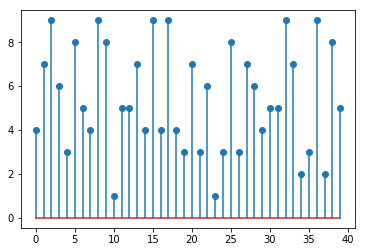

In [6]:
serie=np.random.randint(1,10,40)
plt.stem(serie)

In [7]:
G2=realStreaming1(serie,10)

.......................................................
[(1, 2), (2, 3), (2, 5), (2, 8), (3, 4), (3, 5), (5, 4), (5, 6), (5, 7), (5, 8), (8, 6), (8, 7), (8, 9), (6, 7), (9, 10)]
----------------------------------------------
[[2, 9], [8, 9], [9, 8], [10, 1]]
.......................................................
[(2, 3), (2, 5), (2, 8), (3, 4), (3, 5), (5, 4), (5, 6), (5, 7), (5, 8), (8, 6), (8, 7), (8, 9), (6, 7), (9, 10), (9, 11), (10, 11)]
----------------------------------------------
[[2, 9], [8, 9], [9, 8], [11, 5]]
.......................................................
[(3, 4), (3, 5), (5, 4), (5, 6), (5, 7), (5, 8), (8, 6), (8, 7), (8, 9), (6, 7), (9, 10), (9, 11), (9, 12), (10, 11), (11, 12)]
----------------------------------------------
[[8, 9], [9, 8], [11, 5], [12, 5]]
.......................................................
[(5, 4), (5, 6), (5, 7), (5, 8), (8, 6), (8, 7), (8, 9), (8, 13), (6, 7), (9, 10), (9, 11), (9, 12), (9, 13), (10, 11), (11, 12), (12, 13)]
---------

/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in long_scalars


In [8]:
maxlist(serie[1:11],[],1)

[[6, 9], [7, 9], [9, 5], [10, 5]]

In [9]:
np.argmax(serie[1:11]),np.max(serie[1:11])

(5, 9)

<StemContainer object of 3 artists>

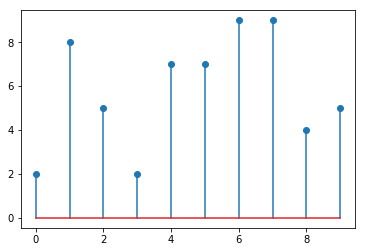

In [10]:
plt.stem(serie[0:10])

<StemContainer object of 3 artists>

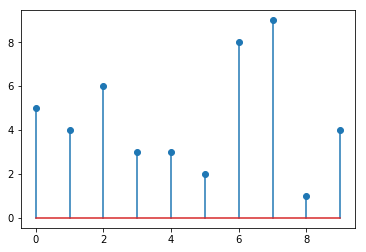

In [11]:
plt.stem(serie[10:20])

<StemContainer object of 3 artists>

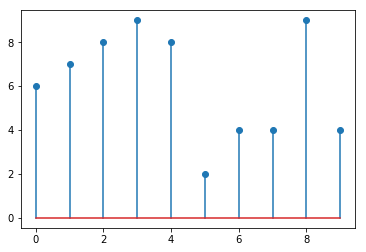

In [12]:
plt.stem(serie[20:30])

<StemContainer object of 3 artists>

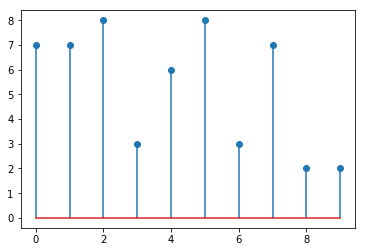

In [40]:
plt.stem(serie[30:])

In [17]:
G2.edges()

EdgeView([(30, 31), (30, 32), (30, 33), (30, 34), (30, 35), (30, 36), (30, 37), (30, 38), (31, 32), (31, 34), (31, 35), (31, 36), (32, 33), (32, 34), (32, 35), (32, 36), (33, 34), (35, 36), (38, 39)])

In [52]:
G.remove_node(15)

In [53]:
G.nodes()

NodeView((10, 11, 12, 13, 14, 16, 17, 18, 19))

In [54]:
G2,x=streamingVN(serie,20)

In [13]:
G2.edges()

EdgeView([(30, 31), (30, 32), (30, 33), (30, 34), (30, 35), (30, 36), (30, 37), (30, 38), (31, 32), (31, 34), (31, 35), (31, 36), (31, 38), (32, 33), (32, 34), (32, 35), (32, 36), (32, 38), (33, 34), (33, 38), (34, 38), (35, 36), (35, 38), (37, 38), (38, 39)])

In [25]:
def lista(TS):
    flag=1
    lmax=[]
    
    while len(TS>1):
        lmax.append([np.argmax(TS),np.max(TS)])
        TS=TS[np.argmax(TS)+1:]
        print(TS)
    return(lmax)
        
        

In [28]:
x=np.random.randint(1,10,100)
lista(x)

[8 5 2 5 8 2 6 9 6 5 8 8 6 4 7 7 3 8 2 6 8 6 2 4 3 7 5 7 2 4 1 8 2 9 4 6 5
 2 1 1 4 9 8 7 7 1 6 6 8 1 8 6 8 4 5 8 2 9 5 9 4 3 4 4 8 4 7 5 7 8 2 1 5 5
 8 1 1 1 6 2 7 5 2]
[6 5 8 8 6 4 7 7 3 8 2 6 8 6 2 4 3 7 5 7 2 4 1 8 2 9 4 6 5 2 1 1 4 9 8 7 7
 1 6 6 8 1 8 6 8 4 5 8 2 9 5 9 4 3 4 4 8 4 7 5 7 8 2 1 5 5 8 1 1 1 6 2 7 5
 2]
[4 6 5 2 1 1 4 9 8 7 7 1 6 6 8 1 8 6 8 4 5 8 2 9 5 9 4 3 4 4 8 4 7 5 7 8 2
 1 5 5 8 1 1 1 6 2 7 5 2]
[8 7 7 1 6 6 8 1 8 6 8 4 5 8 2 9 5 9 4 3 4 4 8 4 7 5 7 8 2 1 5 5 8 1 1 1 6
 2 7 5 2]
[5 9 4 3 4 4 8 4 7 5 7 8 2 1 5 5 8 1 1 1 6 2 7 5 2]
[4 3 4 4 8 4 7 5 7 8 2 1 5 5 8 1 1 1 6 2 7 5 2]
[4 7 5 7 8 2 1 5 5 8 1 1 1 6 2 7 5 2]
[2 1 5 5 8 1 1 1 6 2 7 5 2]
[1 1 1 6 2 7 5 2]
[5 2]
[2]
[]


[[16, 9],
 [7, 9],
 [25, 9],
 [7, 9],
 [15, 9],
 [1, 9],
 [4, 8],
 [4, 8],
 [4, 8],
 [5, 7],
 [0, 5],
 [0, 2]]

In [29]:
x

array([5, 4, 2, 8, 6, 2, 5, 8, 1, 5, 7, 6, 4, 1, 4, 6, 9, 8, 5, 2, 5, 8,
       2, 6, 9, 6, 5, 8, 8, 6, 4, 7, 7, 3, 8, 2, 6, 8, 6, 2, 4, 3, 7, 5,
       7, 2, 4, 1, 8, 2, 9, 4, 6, 5, 2, 1, 1, 4, 9, 8, 7, 7, 1, 6, 6, 8,
       1, 8, 6, 8, 4, 5, 8, 2, 9, 5, 9, 4, 3, 4, 4, 8, 4, 7, 5, 7, 8, 2,
       1, 5, 5, 8, 1, 1, 1, 6, 2, 7, 5, 2])

In [ ]:
def l1(TS,lista)

In [ ]:
def main(TS,window):

In [2]:
def verifyLimit(maxlst,value):
    for mx in maxlst[::-1]:
        if mx[1]<=value:
            maxlst.remove(mx)
    return maxlst
    

In [3]:
def visibility(hp,TS,value,index):
    Nb=index
    Yb=value
    maxslp=1000
    for Na in range(index-1,hp-1,-1):
        Ya=TS[Na]
        slp=(Yb-Ya)/(Nb-Na)
#         print(Nb,Na,slp)
        if slp < maxslp:
            G.add_edge(Nb,Na)
            
            maxslp=slp
            

[9 2 5 1 6 6 6 7 6 7]


<StemContainer object of 3 artists>

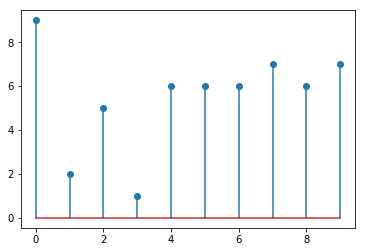

In [4]:
s=np.random.randint(1,10,10)
print(s)
plt.stem(s)

In [50]:
G=nx.Graph()
visibility(0,s,serie[8],8)

8 7 3.0
8 6 0.5
8 5 -1.0
8 4 -1.0
8 3 0.6
8 2 -0.6666666666666666
8 1 0.0
8 0 0.375


In [51]:
G.edges()

EdgeView([(8, 7), (8, 6), (8, 5)])

In [9]:
def newLecture(value,index,maxlist,G):
    maxlst=verifyLimit(maxlst,value)
    if len(maxlst==0):
        hp=0
    else:
        hp=maxlst[-1][0]
    visibility(hp,TS,value)
        
            
    
    

In [53]:
serie=np.random.randint(1,10,10)
G=nx.Graph()
for i in range(len(serie)-1,-1,-1):
    print(i)
    visibility(0,serie,serie[i],i)
    

9
8
7
6
5
4
3
2
1
0


In [54]:
serie

array([3, 1, 9, 8, 1, 8, 1, 1, 6, 2])

<StemContainer object of 3 artists>

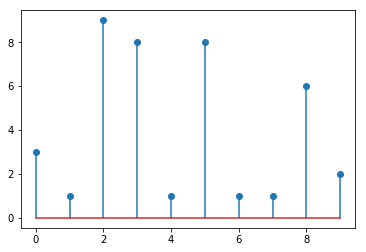

In [55]:
plt.stem(serie)

In [56]:
G.edges()

EdgeView([(9, 8), (8, 7), (8, 6), (8, 5), (7, 6), (7, 5), (6, 5), (5, 4), (5, 3), (5, 2), (4, 3), (3, 2), (2, 1), (2, 0), (1, 0)])

In [12]:
lista=[[1,13],[4,5],[11,3],[12,1]]
valor=14

In [13]:
verifyLimit(lista,valor)

[]

In [43]:
maxlst=[[0,11],[2,5],[3,9],[4,5],[5,4],[7,1]]
value=12

In [41]:
not maxlst

False

In [39]:
maxlst

[1]

In [45]:
maxlst[-1][0]

7

In [46]:
maxlst[1:]

[[2, 5], [3, 9], [4, 5], [5, 4], [7, 1]]

In [24]:
for Na in range(10,5,-1):
    print(Na)

10
9
8
7
6
